In [1]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


# Load the sales datasets (sales_data_part1.csv, sales_data_part2.csv)

In [2]:
sales1 = pd.read_csv('sales_data_part1.csv')
sales2 = pd.read_csv('sales_data_part2.csv')
customers = pd.read_csv('customers.csv')


# Basic dataset info


In [3]:
print(len(customers))
print(list(customers.columns))
customers.head(3)

1378
['customer_id', 'channel', 'city', 'sector']


,customer_id,channel,city,sector
0,CUSTJ00001,online,Irbid,individual
1,CUSTJ00002,offline,Amman,individual
2,CUSTJ00002,online,Irbid,individual


In [4]:
# First look at the dataFrame
print(len(sales1))
print(list(sales1.columns))
sales1.head(3)

4581
['Order_ID', 'Date', 'Customer_ID', 'Country_Code', 'Channel', 'Sales_person', 'Units_Sold', 'Unit_Price', 'Product_Code', 'Product', 'Promotion_Flag', 'Commission_Percent']


,Order_ID,Date,Customer_ID,Country_Code,Channel,Sales_person,Units_Sold,Unit_Price,Product_Code,Product,Promotion_Flag,Commission_Percent
0,ORD0000001,2022-01-14,CUSTJ00001,JO,Online,ahmed,1,925.33,EB01,Laptop,0,0.03
1,ORD0000002,2021-12-21,CUSTJ00002,JO,offline,Sara,5,161.18,EG02,Gaming Chair,0,0.05
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,Offline,Ahmed,3,4.94,E05,Cable,0,0.05


In [5]:
print(len(sales2))
print(len(sales2.columns))
sales2.head(3)

4581
12


,Order_ID,Date,Customer_ID,Country_Code,Channel,Sales_person,Units_Sold,Unit_Price,Product_Code,Product,Promotion_Flag,Commission_Percent
0,ORD0004248,2021-04-05,CUSTL00019,LEBANON,Website,sami,2,597.43,P01,Phone,0,0.02
1,ORD0004249,2021-07-17,CUSTL00019,LEB,Online,sami,1,123.15,F02,Chair,0,0.05
2,ORD0004250,2024-09-18,CUSTL00019,LEB,Website,lina,2,31.02,A01,Accessory,0,0.02


In [6]:
# Data set overviwe
sales1.shape, sales2.shape, customers.shape


((4581, 12), (4581, 12), (1378, 4))

Discover customers dataset

In [7]:
print(f" Number of unique customers: {customers['customer_id'].nunique()}")
print(f" Available channels: {customers['channel'].unique()}")
print(f" citys avalible: {customers['city'].unique()}")
print(f"Avilable Sectors: {customers['sector'].unique()}")
print("\n missing values:")
print(customers.isnull().sum())
print("\n Customer distribution by city:")
print(customers['city'].value_counts())

 Number of unique customers: 1000
 Available channels: ['online' 'offline' 'unknown']
 citys avalible: ['Irbid' 'Amman' 'Aqaba' 'Madaba' 'Zarqa' 'Karak' 'Baalbek' 'Jbeil'
 'Tripoli' 'Beirut']
Avilable Sectors: ['individual' 'office' 'company' 'university' 'government']

 missing values:
customer_id    0
channel        0
city           0
sector         0
dtype: int64

 Customer distribution by city:
city
Amman      406
Irbid      195
Jbeil      178
Beirut     163
Baalbek    155
Tripoli    154
Karak       38
Aqaba       32
Madaba      29
Zarqa       28
Name: count, dtype: int64


Discover sales_1 dataset

In [8]:

print(sales1.info())
print("\n missing values")
print(sales1.isnull().sum())
print(f"\n County Codes: {sales1['Country_Code'].unique()}")
print(f"\n Chanels: {sales1['Channel'].unique()}")
print(f"\n Sales Persons : {sales1['Sales_person'].unique()}")
print(f"\n number of duplicated transaction: {sales1.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            4581 non-null   object 
 1   Date                4581 non-null   object 
 2   Customer_ID         4581 non-null   object 
 3   Country_Code        4581 non-null   object 
 4   Channel             4580 non-null   object 
 5   Sales_person        4581 non-null   object 
 6   Units_Sold          4581 non-null   int64  
 7   Unit_Price          4581 non-null   float64
 8   Product_Code        4581 non-null   object 
 9   Product             4581 non-null   object 
 10  Promotion_Flag      4581 non-null   int64  
 11  Commission_Percent  4581 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 429.6+ KB
None

 missing values
Order_ID              0
Date                  0
Customer_ID           0
Country_Code          0
Channel               1
S

Discover sales2 dataset

In [9]:
print(sales2.info())
print("---------------------------------------------")
print("\n missing values")
print(sales2.isnull().sum())
print(f"\n County Codes: {sales2['Country_Code'].unique()}")
print(f"\n Chanels: {sales2['Channel'].unique()}")
print(f"\n Sales Persons : {sales2['Sales_person'].unique()}")
print(f"\n number of duplicated transaction: {sales2.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            4581 non-null   object 
 1   Date                4581 non-null   object 
 2   Customer_ID         4581 non-null   object 
 3   Country_Code        4581 non-null   object 
 4   Channel             4577 non-null   object 
 5   Sales_person        4581 non-null   object 
 6   Units_Sold          4581 non-null   int64  
 7   Unit_Price          4581 non-null   float64
 8   Product_Code        4581 non-null   object 
 9   Product             4581 non-null   object 
 10  Promotion_Flag      4581 non-null   int64  
 11  Commission_Percent  4581 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 429.6+ KB
None
---------------------------------------------

 missing values
Order_ID              0
Date                  0
Customer_ID           0
Cou

Check the date range in the sales database

In [10]:
print(f"\n Date range in Part 1: {sales2['Date'].min()} {sales2['Date'].max()}")
print(f" Date range in Part 2: {sales2['Date'].min()}  {sales2['Date'].max()}")


 Date range in Part 1: 2021-01-01 2025-07-10
 Date range in Part 2: 2021-01-01  2025-07-10


#1. ***concatenate*** them into one dataframe using pandas

In [11]:
# Check if columns match
list(sales1.columns) == list(sales2.columns)


True

In [12]:
all_sales = pd.concat([sales1, sales2], ignore_index=True)
all_sales.shape

(9162, 12)

للتأكد من عدم وجود اي مدخلات غير منطقية البيانات

In [13]:
cols_to_check = ["Promotion_Flag", "Country_Code", "Channel", "Sales_person", "Units_Sold"]

summary = {}

for col in cols_to_check:
    unique_vals = all_sales[col].unique()
    n_unique = all_sales[col].nunique()
    summary[col] = {
        "number of labels": n_unique,
        " all values": unique_vals[:]
    }

check_df = pd.DataFrame(summary).T

check_df

,number of labels,all values
Promotion_Flag,2,"[0, 1]"
Country_Code,7,"[JO, Jordan, Jordn, Jor, LEB, LEBN, LEBANON]"
Channel,5,"[Online, offline, Offline, Website, in-store, ..."
Sales_person,11,"[ahmed, Sara, Ahmed, rami, Rami, ali, sami, Sa..."
Units_Sold,11,"[1, 5, 3, 2, 4, 6, 10, 7, 8, 9, 0]"


#2. Rename all column names to snake_case format

In [14]:
all_sales.columns = all_sales.columns.str.lower().str.replace(' ', '_')


print(list(all_sales.columns))

customers.columns = customers.columns.str.lower().str.replace(' ', '_')



print(list(customers.columns))

['order_id', 'date', 'customer_id', 'country_code', 'channel', 'sales_person', 'units_sold', 'unit_price', 'product_code', 'product', 'promotion_flag', 'commission_percent']
['customer_id', 'channel', 'city', 'sector']


# 3. Standardize text data, fill missing data with ‘unknown’

In [15]:
missing_data = all_sales.isnull().sum()
missing_percent = (missing_data / len(all_sales)) * 100
missing_percent

order_id              0.000000
date                  0.000000
customer_id           0.000000
country_code          0.000000
channel               0.054573
sales_person          0.000000
units_sold            0.000000
unit_price            0.000000
product_code          0.000000
product               0.000000
promotion_flag        0.000000
commission_percent    0.000000
dtype: float64

In [16]:
all_sales.fillna('unknown',inplace=True)

In [17]:
print("After filling")
all_sales.isnull().sum()


After filling


order_id              0
date                  0
customer_id           0
country_code          0
channel               0
sales_person          0
units_sold            0
unit_price            0
product_code          0
product               0
promotion_flag        0
commission_percent    0
dtype: int64

## duplicated check

duplicates cheak بعد الدمج زاد عن التكرارات  *


Store duplicate records in a separate DataFrame for investigation

In [18]:
# Identify and save duplicate records in the dataset

# ---- Sales1 ----
duplicated_mask_1 = sales1.duplicated()
num_duplicates_1 = duplicated_mask_1.sum()
print(f"Duplicate records in sales1 data: {num_duplicates_1}")
if num_duplicates_1 > 0:
    dup_sales1 = sales1[duplicated_mask_1]
    print("\nDuplicated rows in sales1:")
    print(dup_sales1)
    dup_sales1.to_csv("duplicates_sales1.csv", index=False)

print("\n----------------------------------------------")

# ---- Sales2 ----
duplicated_mask_2 = sales2.duplicated()
num_duplicates_2 = duplicated_mask_2.sum()
print(f"Duplicate records in sales2 data: {num_duplicates_2}")
if num_duplicates_2 > 0:
    dup_sales2 = sales2[duplicated_mask_2]
    print("\nDuplicated rows in sales2:")
    print(dup_sales2)
    dup_sales2.to_csv("duplicates_sales2.csv", index=False)

print("\n----------------------------------------------")

# ---- All Sales (after concatenation) ----
duplicated_mask_all_sales = all_sales.duplicated()
num_duplicates_all_sales = duplicated_mask_all_sales.sum()
print(f"Duplicate records in all sales data: {num_duplicates_all_sales}")
if num_duplicates_all_sales > 0:
    dup_all_sales = all_sales[duplicated_mask_all_sales]
    print("\nDuplicated rows in all_sales:")
    print(dup_all_sales)
    dup_all_sales.to_csv("duplicates_all_sales.csv", index=False)

print("\n----------------------------------------------")

# ---- Customers ----
duplicated_mask_cust = customers.duplicated()
num_duplicates_cust = duplicated_mask_cust.sum()
print(f"Duplicate records in customer data: {num_duplicates_cust}")
if num_duplicates_cust > 0:
    dup_customers = customers[duplicated_mask_cust]
    print("\nDuplicated rows in customers:")
    print(dup_customers)
    dup_customers.to_csv("duplicates_customers.csv", index=False)


Duplicate records in sales1 data: 0

----------------------------------------------
Duplicate records in sales2 data: 10

Duplicated rows in sales2:
        Order_ID        Date Customer_ID Country_Code  Channel Sales_person  \
4567  ORD0006503  2024-06-11  CUSTL00255          LEB   Online         Lina   
4570  ORD0003191  2022-03-02  CUSTJ00407           JO   Online         rami   
4571  ORD0006564  2022-08-18  CUSTL00261      LEBANON   Online         Lina   
4572  ORD0006564  2022-08-18  CUSTL00261      LEBANON   Online         Lina   
4574  ORD0007735  2023-06-26  CUSTL00406         LEBN  Website         Sami   
4575  ORD0004398  2021-10-21  CUSTL00033      LEBANON  Website         Sami   
4576  ORD0004398  2021-10-21  CUSTL00033      LEBANON  Website         Sami   
4578  ORD0003927  2021-07-04  CUSTJ00486          Jor   Online        Ahmed   
4579  ORD0007841  2023-04-25  CUSTL00421         LEBN   Online         Lina   
4580  ORD0007841  2023-04-25  CUSTL00421         LEBN   Onlin

Remove duplicate entries from the main dataset (keep first occurrence)

In [19]:
duplicated_mask_cust = customers.duplicated(subset=['customer_id','channel'])
num_duplicates_cust = duplicated_mask_cust.sum()
print(f"Duplicate records in customer data: {num_duplicates_cust}")
if num_duplicates_cust > 0:
    dup_customers = customers[duplicated_mask_cust]
    print("\nDuplicated rows in customers:")
    print(dup_customers)
    dup_customers.to_csv("duplicates_customers.csv", index=False)

Duplicate records in customer data: 0


In [20]:
all_sales_clean = all_sales.drop_duplicates(keep='first')
print(f" before drop : {len(all_sales)}")
print(f"   number after drop: {len(all_sales_clean)}")
all_sales = all_sales_clean

 before drop : 9162
   number after drop: 9147


Convert data types (ensure dates are datetime, numeric columns are numeric)

In [21]:
all_sales['date'] = pd.to_datetime(all_sales['date'])


 Verify numeric coloums




In [22]:
numeric_cols = ['units_sold', 'unit_price', 'promotion_flag', 'commission_percent']

for col in numeric_cols:
    all_sales[col] = pd.to_numeric(all_sales[col], errors='coerce')

In [23]:
channel_mapping = {
    'Online': 'online',
    'Offline': 'offline',
    'offline': 'offline',
    'Website': 'online',
    'in-store': 'offline',
    'unknown': 'unknown'

}
all_sales['channel'] = all_sales['channel'].map(channel_mapping)
print(all_sales['channel'].unique())

['online' 'offline' 'unknown']


New Columns to Create:


country and sales person

In [24]:


country_map = {
    'jo': 'Jordan', 'jor': 'Jordan', 'jordn': 'Jordan', 'jordan': 'Jordan',
    'leb': 'Lebanon', 'lebn': 'Lebanon', 'lebanon': 'Lebanon'
}


all_sales['country_code'] = all_sales['country_code'].str.strip().str.lower()
all_sales['country_code'] = all_sales['country_code'].map(country_map).fillna(all_sales['country_code'])


all_sales['sales_person'] = all_sales['sales_person'].str.strip().str.lower()


all_sales['sales_person_final'] = (
    all_sales['sales_person'] + "_" + all_sales['country_code'].str.lower()
)


print("\nBefore vs After:")
print(
    all_sales[['sales_person', 'country_code', 'sales_person_final']]
    .drop_duplicates()
    .sort_values(by=['sales_person_final'])
    .head(20)
)


Before vs After:
     sales_person country_code sales_person_final
0           ahmed       Jordan       ahmed_jordan
17            ali       Jordan         ali_jordan
4397          ali      Lebanon        ali_lebanon
4392         lina      Lebanon       lina_lebanon
4            rami       Jordan        rami_jordan
4390         sami      Lebanon       sami_lebanon
1            sara       Jordan        sara_jordan


In [25]:
print(f"\n")
print(f" {len(all_sales)}")
print(f" {all_sales['channel'].unique()}")
print(f" {all_sales['country_code'].unique()}")



 9147
 ['online' 'offline' 'unknown']
 ['Jordan' 'Lebanon']


In [26]:
all_sales.shape

(9147, 13)

In [27]:
all_sales.head()

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent,sales_person_final
0,ORD0000001,2022-01-14,CUSTJ00001,Jordan,online,ahmed,1,925.33,EB01,Laptop,0,0.03,ahmed_jordan
1,ORD0000002,2021-12-21,CUSTJ00002,Jordan,offline,sara,5,161.18,EG02,Gaming Chair,0,0.05,sara_jordan
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,ahmed,3,4.94,E05,Cable,0,0.05,ahmed_jordan
3,ORD0000004,2022-02-21,CUSTJ00002,Jordan,online,ahmed,3,51.21,EG03,Headset,0,0.02,ahmed_jordan
4,ORD0000005,2021-01-14,CUSTJ00002,Jordan,online,rami,2,238.59,P02,Tablet,0,0.05,rami_jordan


unit_price_usd

In [28]:
def convert_to_usd(row):

    price = row['unit_price']
    country = row['country_code'] # Use 'country_code' based on previous data cleaning

    if country == 'Jordan':

        return price * 1.41




In [29]:
all_sales['unit_price_usd'] = all_sales.apply(convert_to_usd, axis=1)
print("✅ Done ")


✅ Done 


discount_pct

In [30]:
all_sales['discount_pct'] = all_sales['units_sold'].apply(lambda x: 10 if x > 5 else 0)
print(f"crate a discount_pct {(all_sales['discount_pct'] > 0).sum()}")


crate a discount_pct 126


In [31]:
all_sales.head()

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent,sales_person_final,unit_price_usd,discount_pct
0,ORD0000001,2022-01-14,CUSTJ00001,Jordan,online,ahmed,1,925.33,EB01,Laptop,0,0.03,ahmed_jordan,1304.7153,0
1,ORD0000002,2021-12-21,CUSTJ00002,Jordan,offline,sara,5,161.18,EG02,Gaming Chair,0,0.05,sara_jordan,227.2638,0
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,ahmed,3,4.94,E05,Cable,0,0.05,ahmed_jordan,6.9654,0
3,ORD0000004,2022-02-21,CUSTJ00002,Jordan,online,ahmed,3,51.21,EG03,Headset,0,0.02,ahmed_jordan,72.2061,0
4,ORD0000005,2021-01-14,CUSTJ00002,Jordan,online,rami,2,238.59,P02,Tablet,0,0.05,rami_jordan,336.4119,0


total_amount

In [32]:
all_sales['total_amount'] = all_sales['units_sold'] * all_sales['unit_price_usd'] * (1 - all_sales['discount_pct']/100)
print("✅ Done")


✅ Done


commission_amount

In [33]:
all_sales['commission_amount'] = all_sales['total_amount'] * all_sales['commission_percent']
print("✅ done ")

✅ done 


year, month,
weekday_name

In [34]:
all_sales['year'] = all_sales['date'].dt.year
all_sales['month'] = all_sales['date'].dt.month
all_sales['weekday_name'] = all_sales['date'].dt.day_name()
print("Done")

Done


sales_volume_category

In [35]:

def categorize_volume(units_sold):
    if units_sold >= 5:
        return 'High'
    elif 3 <= units_sold <= 4:
        return 'Medium'
    else:
        return 'Low'
all_sales['sales_volume_category'] = all_sales['units_sold'].apply(categorize_volume)
volume_dist = all_sales['sales_volume_category'].value_counts()
print(f"✅ Done {volume_dist.to_dict()}")


✅ Done {'Low': 4334, 'Medium': 3404, 'High': 1409}


In [36]:
customer_orders = all_sales['customer_id'].nunique()

In [37]:
customer_orders

1000

In [38]:
print("\n8 custumoer segmentation")


customer_orders = all_sales.groupby('customer_id',as_index=False)['order_id'].nunique().rename(columns={'order_id':'order_count'})
print(f"custmour arder  {customer_orders.min()}, max order = {customer_orders.max()}")

def categorize_customer_loyalty(customer_id):
    order_count = customer_orders.get(customer_id, 0)
    #print(customer_id, order_count)
    if order_count >= 50:
        return 'Loyal'
    elif 10 <= order_count <= 49:
        return 'Premium'
    elif 2 <= order_count <= 9:
        return 'Standard'
    else:
        return 'One-time'

all_sales['customer_segment'] = all_sales['customer_id'].apply(categorize_customer_loyalty)
segment_dist = all_sales['customer_segment'].value_counts()

#print(f"✅ Done: {segment_dist.to_dict()}")


8 custumoer segmentation
custmour arder  customer_id    CUSTJ00001
order_count             1
dtype: object, max order = customer_id    CUSTL00500
order_count            70
dtype: object


In [39]:
customer_orders['customer_segment'] = 'One-time'
customer_orders.loc[customer_orders['order_count'] >= 50, 'customer_segment'] = 'Loyal'
customer_orders.loc[(customer_orders['order_count'] >= 10) & (customer_orders['order_count'] <= 49), 'customer_segment'] = 'Premium'
customer_orders.loc[(customer_orders['order_count'] >= 2) & (customer_orders['order_count'] <= 9), 'customer_segment'] = 'Standard'

In [40]:
all_sales.shape[0]

9147

In [41]:
all_sales = all_sales.merge(customer_orders[['customer_id', 'customer_segment']], on ='customer_id', how = 'left')

In [42]:
all_sales.groupby(['customer_segment_y'])['customer_id'].nunique()

customer_segment_y
Loyal        50
One-time    500
Premium     100
Standard    350
Name: customer_id, dtype: int64

Business Questions


In [43]:
#1
print("1- How many transactions occurred in each sales channel?")
channel_transactions = all_sales['channel'].value_counts()
print(channel_transactions)
print("----------------------------------------------------------")
#2
print("2- How many transactions involve each product? Count Product_Code occurrences")
product_transactions = all_sales['product_code'].value_counts()
print("transactions involve each product:")
print(product_transactions.head(10))
print("----------------------------------------------------------")

#3
print("3- What is the average (mean) unit price across all products?")
avg_price = all_sales['unit_price_usd'].mean()
print(f"average (mean) unit price: ${avg_price:.2f}")
print("----------------------------------------------------------")

#4
print("4- What is the maximum number of units sold in a single transaction?")
max_units = all_sales['units_sold'].max()
print(f"maximum number of units sold : {max_units}")
print("----------------------------------------------------------")

#5
print("5- What is the minimum unit price in the dataset?")
min_price = all_sales['unit_price_usd'].min()
print(f"minimum unit price: ${min_price:.2f}")
print("----------------------------------------------------------")


1- How many transactions occurred in each sales channel?
channel
online     6513
offline    2629
unknown       5
Name: count, dtype: int64
----------------------------------------------------------
2- How many transactions involve each product? Count Product_Code occurrences
transactions involve each product:
product_code
E04     1154
F02      989
EG02     871
E05      793
EG03     789
P02      783
M01      773
P01      772
E02      765
A01      764
Name: count, dtype: int64
----------------------------------------------------------
3- What is the average (mean) unit price across all products?
average (mean) unit price: $245.50
----------------------------------------------------------
4- What is the maximum number of units sold in a single transaction?
maximum number of units sold : 10
----------------------------------------------------------
5- What is the minimum unit price in the dataset?
minimum unit price: $6.22
----------------------------------------------------------


In [44]:
#6
print("6- How many sales transactions had a discount?")
discount_transactions = (all_sales['discount_pct'] > 0).sum()
print(f"transactions had a discount: {discount_transactions}")
print()

#7
print("7- How many unique orders are there ")
unique_orders = all_sales['order_id'].nunique()
print(f"unique orders: {unique_orders}")
print()

#8
print("ا8- How many customers in each segment?")
segment_counts = all_sales.groupby('customer_segment_y')['customer_id'].nunique()
print(segment_counts)
print()

#9
print("9- In 2024, Which day of the week had the highest sales amount?")
sales_2024 = all_sales[all_sales['year'] == 2024]
daily_sales_2024 = sales_2024.groupby('weekday_name')['total_amount'].sum().sort_values(ascending=False)
print("Total sales in 2024")
print(daily_sales_2024)
print(f"Hights day {daily_sales_2024.index[0]} by value ${daily_sales_2024.iloc[0]:.2f}")
print()

#10
print("""10- Identify all sales in 2024 from Jordan where the sales volume is categorized as 'High' and
the products sold were not 'Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair'""")
excluded_products = ['Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair']
jordan_2024_high = all_sales[
    (all_sales['year'] == 2024) &
    (all_sales['country_code'] == 'Jordan') &
    (all_sales['sales_volume_category'] == 'High') &
    (~all_sales['product'].isin(excluded_products))
].groupby('order_id').filter(lambda x: len(x) > 1)
print(f"A- number of transaction {len(jordan_2024_high)}")

premium_customers = jordan_2024_high[jordan_2024_high['customer_segment_y'] == 'Premium']
print(f"B- sales transaction with ‘Premium’ customer segment: {len(premium_customers)}")
print()

6- How many sales transactions had a discount?
transactions had a discount: 126

7- How many unique orders are there 
unique orders: 8481

ا8- How many customers in each segment?
customer_segment_y
Loyal        50
One-time    500
Premium     100
Standard    350
Name: customer_id, dtype: int64

9- In 2024, Which day of the week had the highest sales amount?
Total sales in 2024
weekday_name
Tuesday      129256.26792
Monday       116953.05630
Friday       112199.55150
Saturday      85491.73335
Wednesday     83337.93438
Thursday      82150.11090
Sunday        79073.54589
Name: total_amount, dtype: float64
Hights day Tuesday by value $129256.27

10- Identify all sales in 2024 from Jordan where the sales volume is categorized as 'High' and
the products sold were not 'Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair'
A- number of transaction 0
B- sales transaction with ‘Premium’ customer segment: 0



In [45]:
#11
print("""11- which country and channel combination has the lowest number
of transactions, and might be the best candidate for closure?""")
country_channel = all_sales.groupby(['country_code', 'channel']).size().reset_index(name='transaction_count')
country_channel_sorted = country_channel.sort_values('transaction_count')
print("Number of transactions per country + channel combination:")
print(country_channel_sorted)
print(f"Candidate for closure: {country_channel_sorted.iloc[0]['country_code']} - {country_channel_sorted.iloc[0]['channel']} ({country_channel_sorted.iloc[0]['transaction_count']} معاملة)")
print()


#12
print("# Question 12: Using customer profile - Top sales by city in Jordan via online channel")
customers_jordan = customers[customers['customer_id'].str.startswith('CUSTJ')]
print(f"Number of Jordanian clients: {len(customers_jordan)}")

# Sales grouping by customer
customer_sales = all_sales.groupby('customer_id').agg({
    'units_sold': 'sum',
    'total_amount': 'sum',
    'country_code': 'first' # Changed 'country' to 'country_code'
}).reset_index()
merged_data = customers_jordan.merge(customer_sales, on='customer_id', how='inner')
merged_data = merged_data[merged_data['country_code'] == 'Jordan'] # Changed 'country' to 'country_code'

## Customers using the electronic channel
online_customers = merged_data[merged_data['channel'] == 'online']

if not online_customers.empty:
    city_sales = online_customers.groupby('city')['units_sold'].sum().sort_values(ascending=False)
    print("Total units sold by city in Jordan (electronic channel)")
    print(city_sales)
else:
    print("There is no data for Jordanian customers via the electronic channel.")

## The dominant sector among loyal customers
loyal_customers_data = merged_data[merged_data['customer_id'].isin(
    all_sales[all_sales['customer_segment_y'] == 'Loyal']['customer_id']
)]
if not loyal_customers_data.empty:
    dominant_sector = loyal_customers_data['sector'].value_counts()
    print(f"\n Dominant segment among loyal customers: {dominant_sector.index[0]} ({dominant_sector.iloc[0]} client)")
print()

11- which country and channel combination has the lowest number
of transactions, and might be the best candidate for closure?
Number of transactions per country + channel combination:
  country_code  channel  transaction_count
2       Jordan  unknown                  1
5      Lebanon  unknown                  4
3      Lebanon  offline                466
0       Jordan  offline               2163
1       Jordan   online               2226
4      Lebanon   online               4287
Candidate for closure: Jordan - unknown (1 معاملة)

# Question 12: Using customer profile - Top sales by city in Jordan via online channel
Number of Jordanian clients: 728
Total units sold by city in Jordan (electronic channel)
city
Irbid     7414
Aqaba     1423
Madaba    1248
Karak      831
Amman      804
Zarqa      735
Name: units_sold, dtype: int64

 Dominant segment among loyal customers: university (24 client)



Dominant sector among loyal customers: university


C:\Users\USer\AppData\Local\Temp\ipykernel_22368\3767034229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="coolwarm")


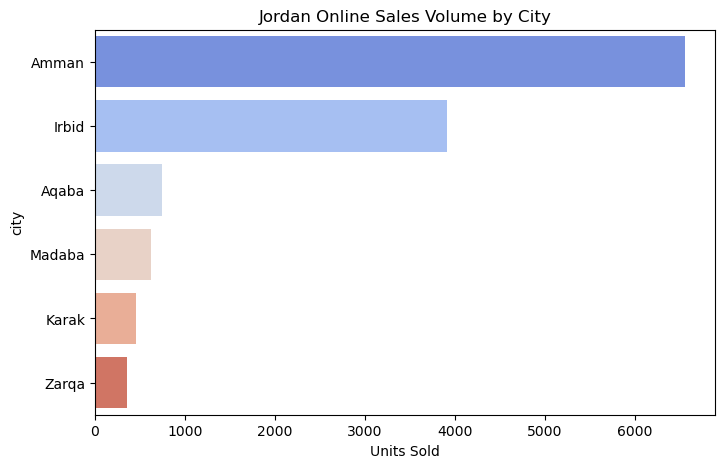

In [46]:
# Dominant sector
# Merge all_sales with customers to get sector information
merged_sales_customers = pd.merge(all_sales, customers[['customer_id', 'sector', 'city']], on='customer_id', how='left')

loyal_sector = merged_sales_customers[merged_sales_customers['customer_segment_y']=='Loyal']['sector'].value_counts()
print("Dominant sector among loyal customers:", loyal_sector.index[0])

# Jordan online city sales
jordan_online = merged_sales_customers[(merged_sales_customers['country_code']=='Jordan') & (merged_sales_customers['channel']=='online')]
city_sales = jordan_online.groupby('city')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="coolwarm")
plt.title("Jordan Online Sales Volume by City")
plt.xlabel("Units Sold")
plt.show()

In [47]:
from collections import Counter

print("# Question 13: Best-selling product pairs in the same order")

multi_orders = all_sales.groupby('order_id')['product'].apply(list)
multi_orders = multi_orders[multi_orders.str.len() > 1]

pairs = []
for products in multi_orders:
    for i in range(len(products)):
        for j in range(i+1, len(products)):
            pairs.append(tuple(sorted([products[i], products[j]])))

top_pairs = Counter(pairs).most_common(10)

print("Top 10 product pairs:")
for i, (pair, count) in enumerate(top_pairs, 1):
    print(f"{i}. {pair[0]} + {pair[1]}: {count}")


# Question 13: Best-selling product pairs in the same order
Top 10 product pairs:
1. Keyboard + Mouse: 383
2. Chair + Laptop: 182
3. Gaming Chair + Headset: 101


# Question 13: Best-selling product pairs in the same order
Top 10 product pairs:
1. Keyboard + Mouse: 383
2. Chair + Laptop: 182
3. Gaming Chair + Headset: 101


C:\Users\USer\AppData\Local\Temp\ipykernel_22368\303155261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Pair", x="Count", data=pair_df, palette="Blues_d")


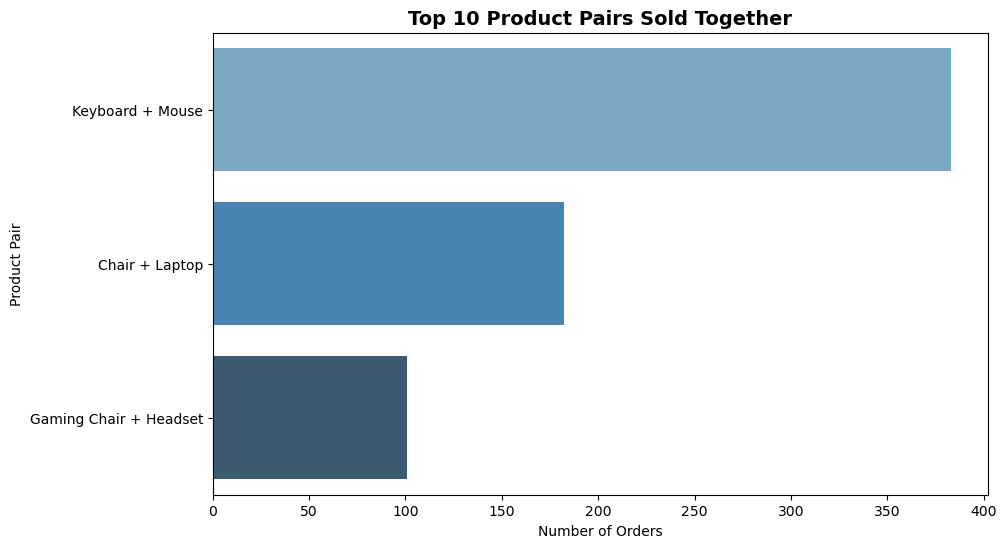

In [48]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("# Question 13: Best-selling product pairs in the same order")

multi_orders = all_sales.groupby('order_id')['product'].apply(list)
multi_orders = multi_orders[multi_orders.str.len() > 1]

pairs = Counter(
    combo
    for products in multi_orders
    for combo in combinations(sorted(products), 2)
)

top_pairs = pairs.most_common(10)

print("Top 10 product pairs:")
for i, (pair, count) in enumerate(top_pairs, 1):
    print(f"{i}. {pair[0]} + {pair[1]}: {count}")

pair_df = pd.DataFrame(top_pairs, columns=['Pair','Count'])
pair_df['Pair'] = pair_df['Pair'].apply(lambda x: f"{x[0]} + {x[1]}")

plt.figure(figsize=(10,6))
sns.barplot(y="Pair", x="Count", data=pair_df, palette="Blues_d")
plt.title("Top 10 Product Pairs Sold Together", fontsize=14, fontweight="bold")
plt.xlabel("Number of Orders")
plt.ylabel("Product Pair")
plt.show()


C:\Users\USer\AppData\Local\Temp\ipykernel_22368\1837135966.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Pair", data=pair_df, palette="muted")


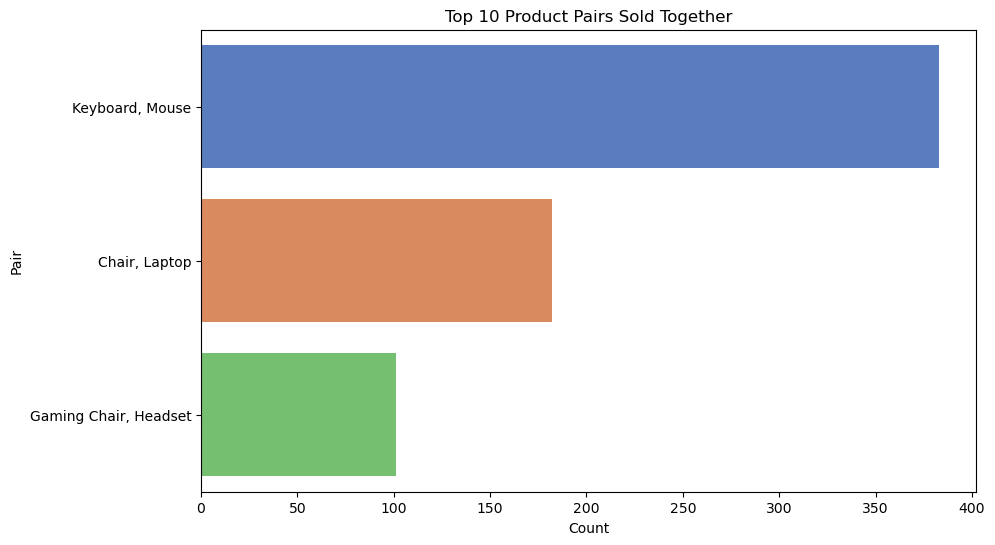

In [49]:
#15
from itertools import combinations
from collections import Counter


pairs = Counter()

for order, group in all_sales.groupby('order_id'):
    items = group['product'].unique()
    for combo in combinations(sorted(items), 2):
        pairs[combo] += 1

top_pairs = pairs.most_common(10)
pair_df = pd.DataFrame(top_pairs, columns=['Pair','Count'])

# Convert tuples in 'Pair' column to strings
pair_df['Pair'] = pair_df['Pair'].apply(lambda x: ', '.join(x))

plt.figure(figsize=(10,6))
sns.barplot(x="Count", y="Pair", data=pair_df, palette="muted")
plt.title("Top 10 Product Pairs Sold Together")
plt.show()

In [50]:
print("Question 15: Best Sales Representative by Total Sales (2022, 2023, 2024)")

for year in [2022, 2023, 2024]:
    data = all_sales[all_sales['year'] == year]
    if data.empty:
        continue

    sales_by_person = data.groupby('sales_person_final')['total_amount'].sum()

    best_person = sales_by_person.idxmax()
    best_sales = sales_by_person.max()

    print(f"\n{year}:")
    print(f"Best salesperson: {best_person} (${best_sales:.2f})")
    print("All delegates' performance:")
    print(sales_by_person.sort_values(ascending=False))


Question 15: Best Sales Representative by Total Sales (2022, 2023, 2024)

2022:
Best salesperson: ahmed_jordan ($214093.95)
All delegates' performance:
sales_person_final
ahmed_jordan    214093.94880
rami_jordan     192504.73380
ali_jordan      107445.96774
sara_jordan      82559.95560
ali_lebanon          0.00000
lina_lebanon         0.00000
sami_lebanon         0.00000
Name: total_amount, dtype: float64

2023:
Best salesperson: rami_jordan ($216869.98)
All delegates' performance:
sales_person_final
rami_jordan     216869.97936
ahmed_jordan    196146.16455
ali_jordan      119815.04892
sara_jordan      89249.81058
ali_lebanon          0.00000
lina_lebanon         0.00000
sami_lebanon         0.00000
Name: total_amount, dtype: float64

2024:
Best salesperson: ahmed_jordan ($255498.59)
All delegates' performance:
sales_person_final
ahmed_jordan    255498.59175
rami_jordan     224060.63109
ali_jordan      116818.64100
sara_jordan      92084.33640
ali_lebanon          0.00000
lina_lebanon 

In [51]:


#16
print("Question 16: Highest and lowest commission by sales person")

commissions = all_sales.groupby('sales_person_final')['commission_amount'].sum()

sorted = commissions.sort_values(ascending=False)

print("Total commissions by delegate:")
print(sorted)

print(f"\nHighest commission: {sorted.idxmax()} (${sorted.max():.2f})")
print(sorted.min())



Question 16: Highest and lowest commission by sales person
Total commissions by delegate:
sales_person_final
ahmed_jordan    32737.896145
rami_jordan     31687.246235
ali_jordan      16569.036251
sara_jordan     13573.466830
ali_lebanon         0.000000
lina_lebanon        0.000000
sami_lebanon        0.000000
Name: commission_amount, dtype: float64

Highest commission: ahmed_jordan ($32737.90)
0.0


In [52]:
#17
print("Question 17: Annual change in sales for each country:")

yearly_sales = all_sales.groupby(['country_code', 'year'])['total_amount'].sum().unstack(fill_value=0)

print("Total annual sales:")
print(yearly_sales)

yoy_change = yearly_sales.pct_change() * 100
print("\nAnnual change (YoY%):")
print(yoy_change)

for country in ['Jordan', 'Lebanon']:
    if country in yearly_sales.columns:
        avg_growth = yoy_change[country].mean(skipna=True)
        if avg_growth > 5:
            trend = "Continuous growth"
        elif avg_growth > -5:
            trend = "Stable"
        else:
            trend = "Decline"
        print(f"{country}: {trend} (Average growth: {avg_growth:.1f}%)")

Question 17: Annual change in sales for each country:
Total annual sales:
year                  2021          2022          2023          2024  \
country_code                                                           
Jordan        609771.41295  596604.60594  622081.00341  688462.20024   
Lebanon            0.00000       0.00000       0.00000       0.00000   

year                  2025  
country_code                
Jordan        346446.23973  
Lebanon            0.00000  

Annual change (YoY%):
year           2021   2022   2023   2024   2025
country_code                                   
Jordan          NaN    NaN    NaN    NaN    NaN
Lebanon      -100.0 -100.0 -100.0 -100.0 -100.0


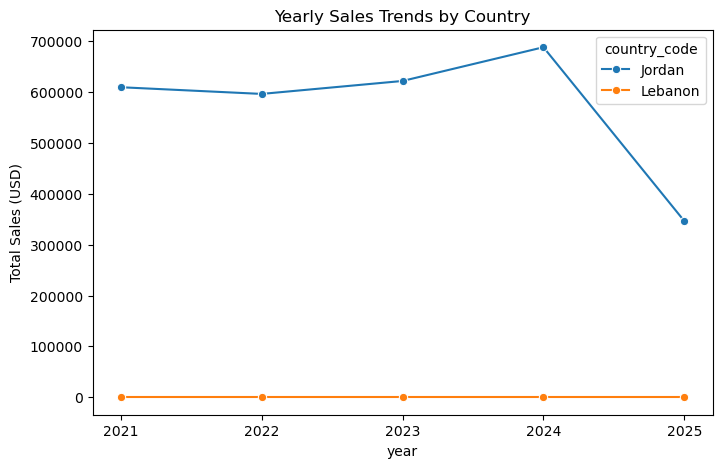

In [53]:
country_year = all_sales.groupby(['year','country_code'])['total_amount'].sum().reset_index()
country_year['YoY_change'] = country_year.groupby('country_code')['total_amount'].pct_change()*100

country_year['year'] = country_year['year'].astype(str)

plt.figure(figsize=(8,5))
sns.lineplot(x="year", y="total_amount", hue="country_code", data=country_year, marker="o")
plt.title("Yearly Sales Trends by Country")
plt.ylabel("Total Sales (USD)")
plt.show()


In [54]:
all_sales.head()


,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,...,unit_price_usd,discount_pct,total_amount,commission_amount,year,month,weekday_name,sales_volume_category,customer_segment_x,customer_segment_y
0,ORD0000001,2022-01-14,CUSTJ00001,Jordan,online,ahmed,1,925.33,EB01,Laptop,...,1304.7153,0,1304.7153,39.141459,2022,1,Friday,Low,One-time,One-time
1,ORD0000002,2021-12-21,CUSTJ00002,Jordan,offline,sara,5,161.18,EG02,Gaming Chair,...,227.2638,0,1136.3190,56.815950,2021,12,Tuesday,High,One-time,Standard
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,ahmed,3,4.94,E05,Cable,...,6.9654,0,20.8962,1.044810,2021,12,Friday,Medium,One-time,Standard
3,ORD0000004,2022-02-21,CUSTJ00002,Jordan,online,ahmed,3,51.21,EG03,Headset,...,72.2061,0,216.6183,4.332366,2022,2,Monday,Medium,One-time,Standard
4,ORD0000005,2021-01-14,CUSTJ00002,Jordan,online,rami,2,238.59,P02,Tablet,...,336.4119,0,672.8238,33.641190,2021,1,Thursday,Low,One-time,Standard


In [55]:
#18
## Monthly product summary
monthly_report = all_sales.groupby(['product', 'year', 'month']).agg(
    total_sales=('total_amount', 'sum'),
    transactions=('order_id', 'count'),
    units=('units_sold', 'sum')
).reset_index()

print("Example: January 2024 (Top 5 products):")
jan_2024 = monthly_report.query("year == 2024 & month == 1") \
                         .sort_values('total_sales', ascending=False) \
                         .head(5)
print(jan_2024)

print("\nLaptop sales trend in 2024:")
laptop_2024 = monthly_report.query("product == 'Laptop' & year == 2024") \
                            .sort_values('month')

if not laptop_2024.empty:
    print(laptop_2024[['month','total_sales','transactions','units']])
else:
    print("No laptop sales in 2024")


Example: January 2024 (Top 5 products):
          product  year  month  total_sales  transactions  units
531         Phone  2024      1   16397.0874            17     46
586        Tablet  2024      1   11369.5350            15     47
366        Laptop  2024      1    7516.8510             7     10
421       Monitor  2024      1    5797.5252            23     62
201  Gaming Chair  2024      1    1865.8107            10     18

Laptop sales trend in 2024:
     month  total_sales  transactions  units
366      1    7516.8510             7     10
367      2   31996.0161            12     32
368      3    9629.3412             8     19
369      4   17696.6985            13     25
370      5   33325.4064            19     34
371      6   20926.3599            16     27
372      7   26997.6507            16     34
373      8   16979.2341            11     21
374      9   22940.3334            13     25
375     10   15572.5053            11     19
376     11   12659.0787            10     24
3

In [56]:
#19
print("# Question 19: Promotion Periods")

promotions = all_sales[all_sales['promotion_flag'] == 1]

promotion_summary = (
    promotions.groupby(['year', 'month'])['product']
              .unique()
              .reset_index()
)

num_periods = len(promotion_summary)
print(f"Number of promotion periods: {num_periods}\n")

# Question 19: Promotion Periods
Number of promotion periods: 3



## Visualization part

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'



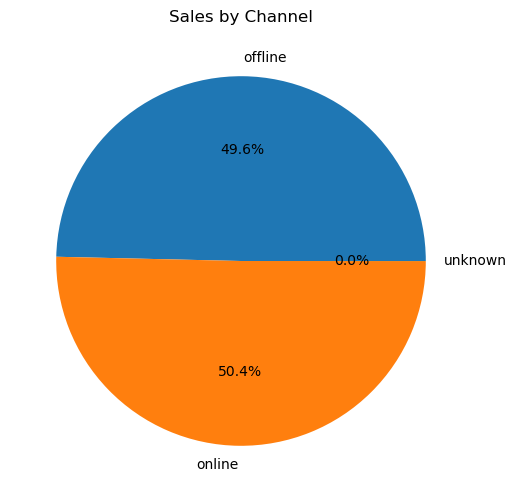

In [58]:
1
# ==============================
channel_sales = all_sales.groupby('channel')['total_amount'].sum()
plt.figure(figsize=(6,6))
plt.pie(channel_sales.values, labels=channel_sales.index, autopct='%1.1f%%')
plt.title("Sales by Channel")
plt.show()


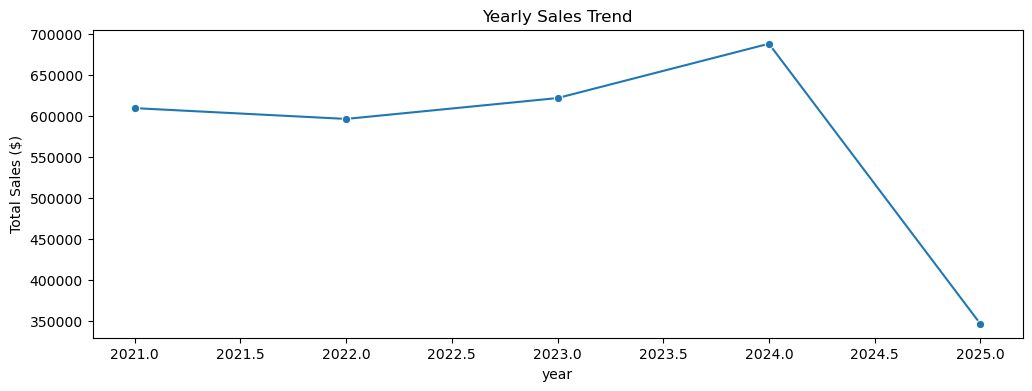

In [59]:

yearly_sales = all_sales.groupby('year')['total_amount'].sum().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(x='year', y='total_amount', data=yearly_sales, marker="o")
plt.title("Yearly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.show()

In [60]:
# ==============================
monthly_2024 = all_sales[all_sales['year']==2024].groupby('month')['total_amount'].sum().reset_index()
fig = px.line(monthly_2024, x='month', y='total_amount', markers=True, title="Monthly Sales in 2024")
fig.show()

In [61]:
import plotly.express as px


monthly_sales = all_sales.groupby(['country_code', 'year', 'month'])['total_amount'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))


fig = px.line(
    monthly_sales,
    x="date",
    y="total_amount",
    color="country_code",
    markers=True,
    title="Monthly Revenue Trends by Country"
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly Revenue (USD)",
    hovermode="x unified"
)

fig.show()

In [63]:
all_sales.head()

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,...,unit_price_usd,discount_pct,total_amount,commission_amount,year,month,weekday_name,sales_volume_category,customer_segment_x,customer_segment_y
0,ORD0000001,2022-01-14,CUSTJ00001,Jordan,online,ahmed,1,925.33,EB01,Laptop,...,1304.7153,0,1304.7153,39.141459,2022,1,Friday,Low,One-time,One-time
1,ORD0000002,2021-12-21,CUSTJ00002,Jordan,offline,sara,5,161.18,EG02,Gaming Chair,...,227.2638,0,1136.3190,56.815950,2021,12,Tuesday,High,One-time,Standard
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,ahmed,3,4.94,E05,Cable,...,6.9654,0,20.8962,1.044810,2021,12,Friday,Medium,One-time,Standard
3,ORD0000004,2022-02-21,CUSTJ00002,Jordan,online,ahmed,3,51.21,EG03,Headset,...,72.2061,0,216.6183,4.332366,2022,2,Monday,Medium,One-time,Standard
4,ORD0000005,2021-01-14,CUSTJ00002,Jordan,online,rami,2,238.59,P02,Tablet,...,336.4119,0,672.8238,33.641190,2021,1,Thursday,Low,One-time,Standard


In [64]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# 1. Sales by Channel
channeel_sales = all_sales.groupby('channel')['total_amount'].sum().reset_index()

# 2. Yearly Sales Trend
yearly_sales = all_sales.groupby('year')['total_amount'].sum().reset_index()

# 3. Revenue by Weekdays and Months
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = all_sales.groupby(['weekday_name','month'])['total_amount'].sum().reset_index()

# 4. Top Selling Products
top_products = all_sales.groupby('product')['units_sold'].sum().sort_values(ascending=False).reset_index()
top_product = top_products.head(1)


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales by Channel", "Yearly Sales Trend", 
                    "Revenue by Weekdays and Months", "Top 10 Selling Products"),
    specs=[[{"type": "domain"}, {"type": "xy"}],
           [{"type": "heatmap"}, {"type": "xy"}]]
)

# 1. Pie chart
fig.add_trace(
    go.Pie(labels=all_sales['channel'], values=all_sales['total_amount'], hole=0.3),
    row=1, col=1
)

# 2. Line chart
fig.add_trace(
    go.Scatter(x=yearly_sales['year'], y=yearly_sales['total_amount'], 
               mode="lines+markers", line=dict(color="blue")),
    row=1, col=2
)

# 3. Heatmap
fig.add_trace(
    go.Heatmap(
        x=heatmap_data['month'], 
        y=heatmap_data['weekday_name'], 
        z=heatmap_data['total_amount'],
        colorscale="Blues",
        colorbar=dict(title="Revenue")
    ),
    row=2, col=1
)

# 4. Bar chart 
fig.add_trace(
    go.Bar(x=top_products['product'].head(10), y=top_products['units_sold'].head(10), 
           text=top_products['units_sold'].head(10), textposition="outside"),
    row=2, col=2
)

fig.update_layout(
    height=900, width=1100,
    title_text="Sales Dashboard",
    showlegend=True
)

fig.show()

print(f"🏆 Top Selling Product: {top_product.iloc[0]['product']} "
      f"with {top_product.iloc[0]['units_sold']} units sold")


🏆 Top Selling Product: Keyboard with 3091 units sold
